# Depletion Forces

Depletion forces are entropic forces which arise from osmotic pressure differences. These osmotic pressure differences are the result of regions in space which are excludeded from the access of certain components of a solution. In the simplest case, the a component of s solution is excluded due to steric interactions, i.e. the component does not fit into the region due to its size.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.constants import c,epsilon_0,e,physical_constants
import json

%config InlineBackend.figure_format = 'retina' 

with open('style.json', 'r') as fp:
    style = json.load(fp)
    
plt.rcParams.update(style) 


## Depletion force between two plates

Consider the picture below, where colloids are contained in a suspension together with two plates. Then there is a region, which is inaccessible by the centers of the colloids of radius $\sigma/2$ that is indicated by the dahsed lines. If these regions between the plates overlap, not colloid can enter this region and the number density of the colloids is different inside as compared to the outside. This creates an osmotic pressure difference.

![depletion_plates](img/depletion_plates.png)

The osmotic pressure difference can be calculated with the help of the van't Hoff equation for the osmotic pressure $\Pi=nk_B T$, where $n$ is the number density. In the case the distance of the two plates is larger than the diamater of the two plates, $h>\sigma$, we have $\Pi_i=\Pi_o= nk_B T$ so the difference $P=\Pi_i-\Pi_o=0$, so there is not pressure difference. 
In the case when there is no colloid between the plates we have $\Pi_i =0$ and  $\Pi_o =nk_B T$ such that

\begin{equation}
P=\Pi_i-\Pi_o=-nk_B T
\end{equation}

Thus there is an effective pressure that is compressing the two plates. As the force per area that is required is the pressure and thus 

\begin{equation}
P=-\frac{dw}{dh}
\end{equation}

we can calculate the energy per area that is needed to seperate the two plates to a distance $h$. This is then found to be linear in the distance $h$

\begin{equation}
w(h)=-n k_B T (\sigma-h)
\end{equation}

for all $h<\sigma$, while it is zero for $h>\sigma$.



In [2]:
def depletion(h,sigma,n):  
    return(np.where(h<sigma, -n*(sigma-h),0))

In [3]:
sigma=1
h=np.linspace(0,5,100)

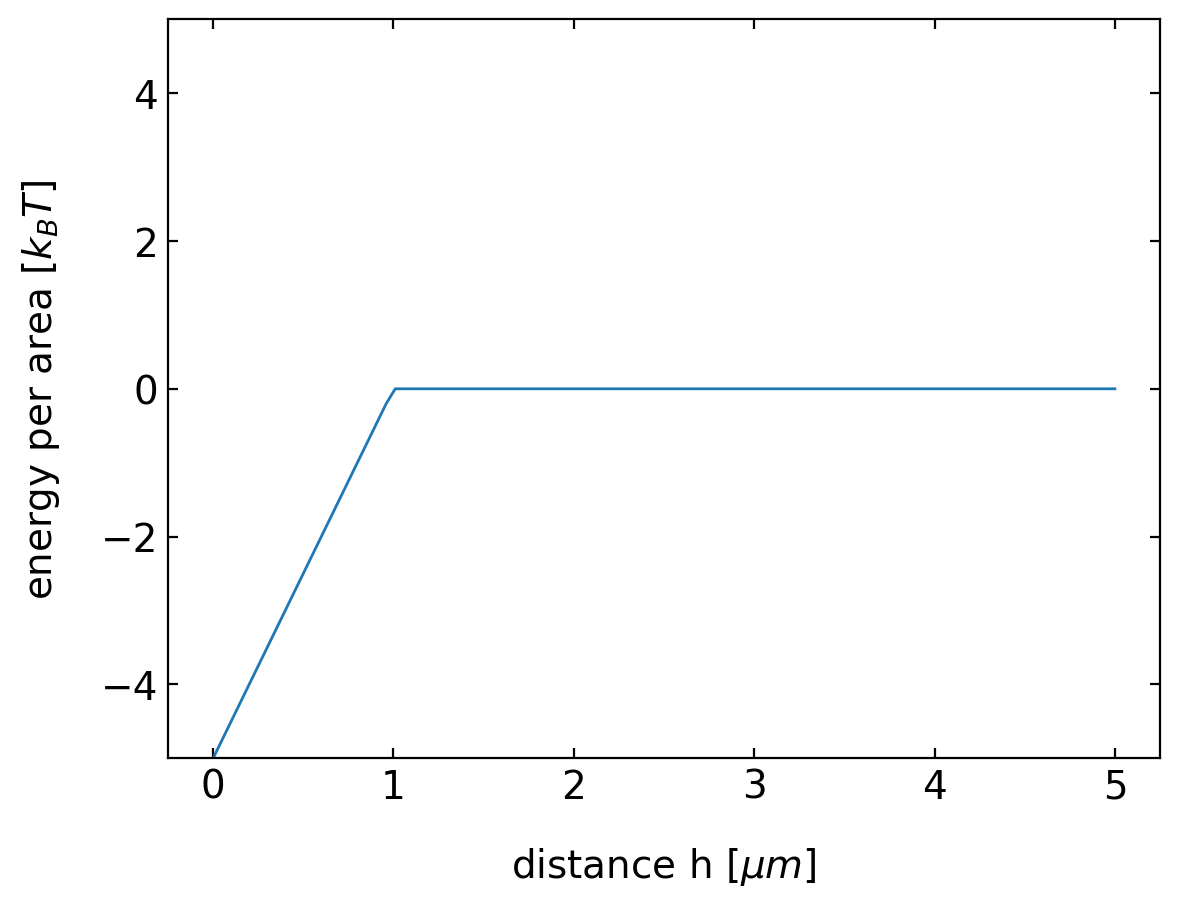

In [4]:
plt.plot(h,depletion(h,sigma,5))
plt.xlabel(r"distance h $[\mu m]$")
plt.ylabel("energy per area $[k_B T]$")
plt.ylim(-5,5)
plt.show()


## Depletion force between two spheres 


To describe the depletion interaction between two spheres (radius $R$) in a solution of smaller spheres (radius $σ/2$), we may use the same approach of assuming an isotropic osmotic pressure of the smaller spheres.
The smaller spheres can actually not approach a spherical shell of thickness $σ/2$ around the larger spheres or a total volume of $4π(R+σ/2)^3/3$ . The pressure on the large spheres has no consequences except in the case where the two spheres approach closer than $r≤2(R+σ/2)=2R_d$. In this case the two excluded volumes around each sphere overlap to a lens-like volume. Due to this overall, the forces which create the pressure on the spherical surface up to an angle $θ_0$ are unbalanced from the other side of the surface (see image) and result in an attractive interaction. The surface element between $\theta$ and $\theta d\theta$ is then given by

\begin{equation}
2\pi R_{d}^2 \sin(\theta)d\theta
\end{equation}

but only the force components along the connecting line contribute. 

![depletion_spheres](img/depletion_spheres.png)
 
The total force is then calculated from the osmotic pressure times the surface area of the spherical cap by just taking into account the force components along the connecting line (an additional factor $\cos(\theta)$). This the read

\begin{equation}
F(r)=-2nk_{\rm B}T\pi (R+\sigma/2)^2\int\limits_{0}^{\theta_{0}}\sin(\theta)\cos(\theta)\mathrm d\theta
\end{equation}

resulting in

\begin{equation}
F(r)=-nk_{\rm B}T\pi (R_{d})^2\left [ 1+\left ( \frac{r}{2R_{d}}\right )^2\right ]
\end{equation}

which is valid if the distance between the centers of the large spheres is $r<2(R+σ/2)$. For $r≥2(R+σ/2)$ there is no depletion of the smaller spheres from the region between the larger spheres and the force is zero, i.e., $F(r)=0$.

Calculating again the interction free energy $w(r)$, we have to integrate the force betwen $r$ and $2R_{d}$, which is given by

$$w(r)=\int_r^{2R_d}F(r)dr=-nk_B T V_{ov}(r)$$

where 

$$V_{ov}=\frac{4\pi}{3}R_{d}^3\left [ 1-\frac{3}{4}\frac{r}{R_d}+\frac{1}{16}\left ( \frac{r}{R_d}\right )^3 \right ]$$

In [5]:
def depletion_sphere(r,R,sigma,n):
    Rd=2*R+sigma
    Vov=4*np.pi*Rd**3/3*(1-3*r/4/Rd+(r/Rd)**3/16)
    return(np.where(r>=2*R,np.where(r<2*R+sigma, -n*Vov,0),0))

In [6]:
sigma=2
R=5
n=1e-3
r=np.linspace(2*R,15,500)

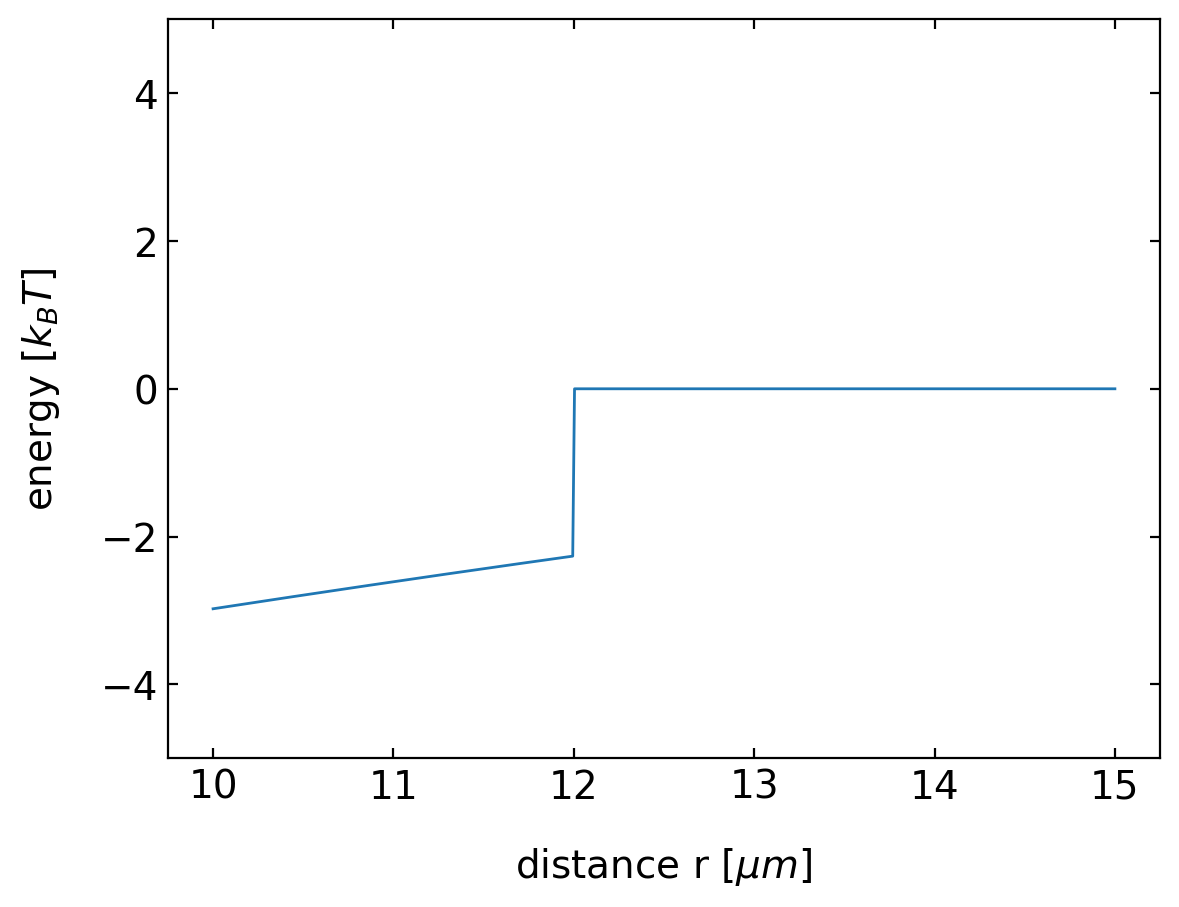

In [7]:
plt.plot(r,depletion_sphere(r,R,sigma,n))
plt.xlabel(r"distance r $[\mu m]$")
plt.ylabel("energy $[k_B T]$")
plt.ylim(-5,5)
plt.show()

## General description

A more general description of the depletion interaction may be obtained based on our introduction into statistical physics at the beginning of the course. There we stated that the probability of finding a system in a stet of energy $E$ is

\begin{equation}
p(E)=\frac{e^{-\beta E}}{Z},
\end{equation}

where $\beta=1/k_{\rm B}T$ and the partition function $Z$ is

\begin{equation}
Z=\sum_{i}e^{-\beta E_{i}}
\end{equation}

for a system with a discrete number of states numbered by the indexi.For a single particle with a continuous number of energies the energy may look like

\begin{equation}
E=\frac{p^2}{2m}+U(q),
\end{equation}

where $q$ is some general coordinate. The classical partition function for a system of N particles is then

\begin{equation}
Z=\frac{1}{N!h^{3N}}\int \mathrm d^{3}p^{N}\int \mathrm d^{3}q^{N}\exp\left ( -\beta \left [ \sum_{i}\frac{p^2}{2m}+U(q^N)\right ]\right ),
\end{equation}

where we use the notation $p^N$ and $q^N$ to denote the whole set of variables. The prefactor is appropriate for indistinguishable particles and the phase space normalization factor $h$ (Planck’s constant) for every pair of $p$ and $q$. Since there is no issue of the non-commutation of positions and momenta we can perform the momentum integrals exactly, yielding

\begin{equation}
Z=\frac{1}{N!}\frac{1}{\Lambda^{3N}}\int \mathrm d^{3}q^{N}\exp(-\beta U(q^{N})),
\end{equation}

where the thermal de Broglie wavelength $Λ$ is

\begin{equation}
\Lambda=\frac{h}{\sqrt{2 \pi m k_{\rm B}T}}.
\end{equation}

In the case of two interacting large spheres in a solution of small spheres with all spheres being hard spheres, the integration over the exponential function yields

\begin{equation}
Z=\frac{V_{A}^{N}}{N! \Lambda^{3N}}
\end{equation}

with $V_A$ being the volume available to the small spheres, i.e., $V_A=V-V_{E}^{'} $ for $r<D+d$ and $V_A=V-V_E$ for $r>D+d$ with $V_E=π(D+d)^3/3$ and $V_{E}^{'}=V_E-(2πl^2)/3 [3(D+d)/2-l]$ and $l=(D+d)/2-r/2$.
The calculation then yields the free energy

\begin{equation}
G=-k_{\rm B}T\ln(Z) =-k_{\rm B}T\ln\left (\frac{V_{A}^N}{N!\Lambda^{3N}}\right).
\end{equation}

Using Stirling’s formula again this can be turned into

\begin{equation}
G=G_{\rm ideal}-Nk_{\rm B}\ln\left (\frac{V_{A}}{V}\right).
\end{equation}

The ideal contribution to the free energy is constant with the separation of the large sphere, so it does not contribute to the depletion force. It reads

\begin{equation}
G_{\rm ideal}=-Nk_{\rm B}T\left (1-\ln\left (\frac{N\Lambda^3}{V}\right)\right).
\end{equation}

The distance-dependent part still contains the logarithm which we can approximate by

\begin{equation}
\ln\left (\frac{V_{A}}{V}\right)\approx -\frac{V_{E}}{V}+\frac{\pi}{6V}(D+d-r)^2(D+d+r/2)
\end{equation}

for the case of the overlapping excluded volumes. This gives then finally a force

\begin{equation}
F=-\frac{N}{4V}k_{\rm B}T\pi(D+d-r)(D+d+r)
\end{equation}

for $r<d+D$. For all other distances of the two centers of the spheres, the depletion force is zero.